# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # pause for 1 second using time.sleep() - avoiods the openweather API key from being disabled
        time.sleep(1)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(3)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | walvis bay
Processing Record 2 of Set 1 | kisangani
Processing Record 3 of Set 1 | kapuskasing
Processing Record 4 of Set 1 | guachochi
City not found. Skipping...
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | mato verde
City not found. Skipping...
Processing Record 7 of Set 1 | san antonio de pale
City not found. Skipping...
Processing Record 8 of Set 1 | dudinka
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | callao
Processing Record 11 of Set 1 | dabat
Processing Record 12 of Set 1 | timbuktu
Processing Record 13 of Set 1 | boumagueur
Processing Record 14 of Set 1 | ceerigaabo
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | port mathurin
Processing Record 17 of Set 1 | kyaikkami
Processing Record 18 of Set 1 | dzhambeyty
Processing Record 19 of Set 1 | virginia
Processing Record 20 of Set 1 | port-aux-francais
Processing

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

In [ ]:
# Display sample data
city_data_df.head()

In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,georgetown,5.4112,100.3354,80.53,73,20,2.30,MY,1741044533
1,waitangi,-43.9535,-176.5597,64.81,97,100,5.01,NZ,1741044537
2,isafjordur,66.0755,-23.1240,27.61,93,100,18.10,IS,1741044541
3,aksay,47.2600,39.8700,26.82,86,54,6.55,RU,1741044545
4,grytviken,-54.2811,-36.5092,46.38,97,100,10.29,GS,1741044549


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

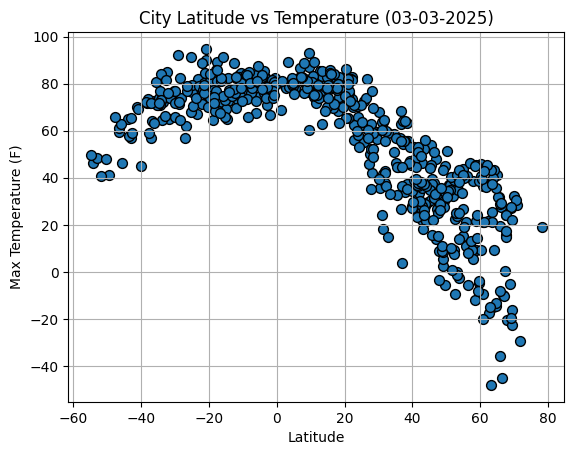

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
      
)

# Incorporate the other graph properties
plt.title("City Latitude vs Temperature (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

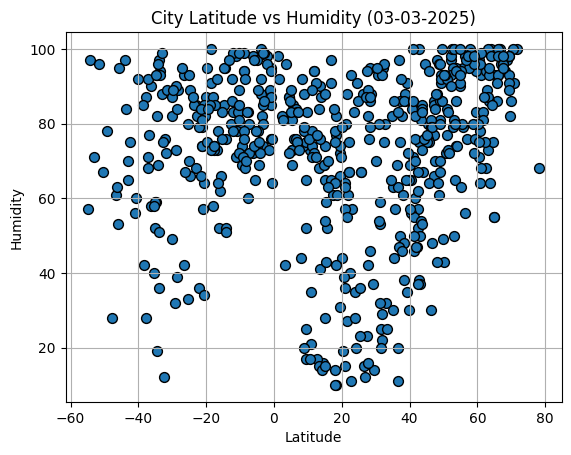

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50    
)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

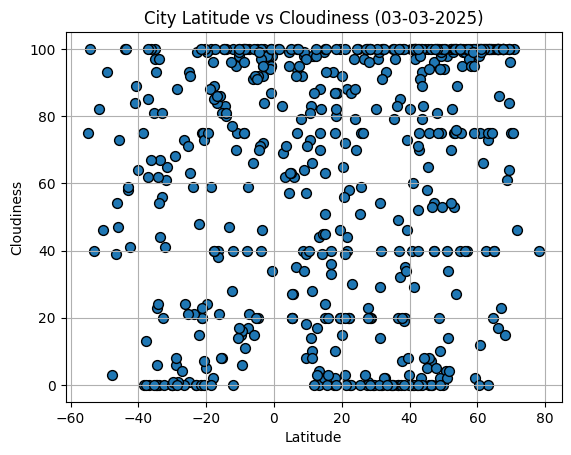

In [10]:
# Build the scatter plots for latitude vs. Cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50    
)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

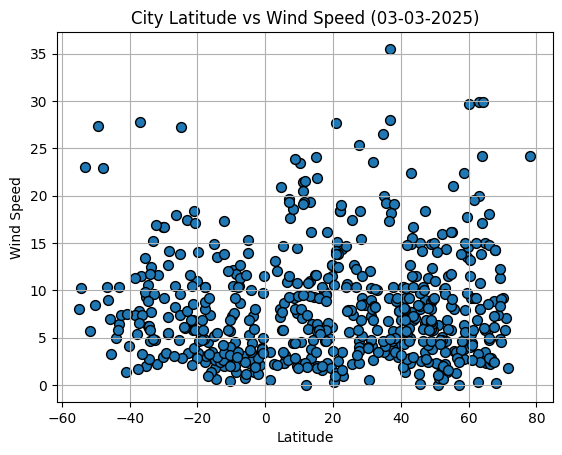

In [11]:
# Build the scatter plots for Latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50    
)

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):

    # Compute linear regression 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values, y_values, s=20)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=  0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,georgetown,5.4112,100.3354,80.53,73,20,2.30,MY,1741044533
2,isafjordur,66.0755,-23.1240,27.61,93,100,18.10,IS,1741044541
3,aksay,47.2600,39.8700,26.82,86,54,6.55,RU,1741044545
6,tabou,4.4230,-7.3528,79.93,87,99,8.03,CI,1741044558
7,vaasa,63.0960,21.6158,37.42,73,0,20.00,FI,1741044562


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,64.81,97,100,5.01,NZ,1741044537
4,grytviken,-54.2811,-36.5092,46.38,97,100,10.29,GS,1741044549
5,punta arenas,-53.1500,-70.9167,48.31,71,40,23.02,CL,1741044294
8,adamstown,-25.0660,-130.1015,77.99,70,1,13.80,PN,1741044566
9,avarua,-21.2078,-159.7750,84.25,74,75,6.91,CK,1741044570


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7225993002442493


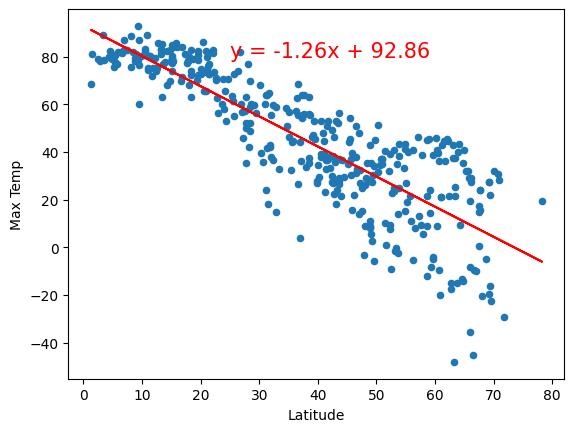

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Max Temp", (25, 80))


The r-value is: 0.380025977956327


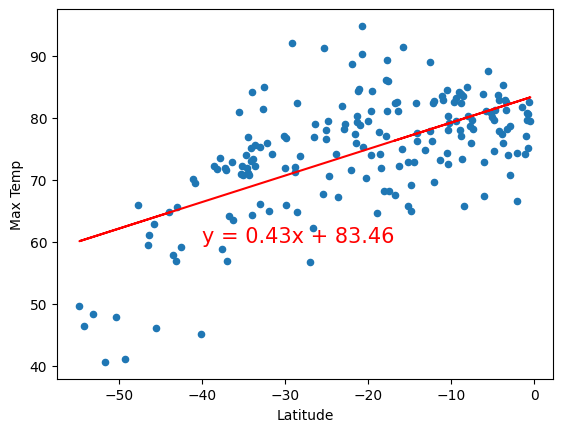

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Max Temp", (-40,60))


**Discussion about the linear relationship:** The high r value indicates a strong positive correlation between latitude and max temperature. R values is 0.27 ~ 0.3 that there is a weak positive correlation in the southern hemispher (due to the season).

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.14173486585172357


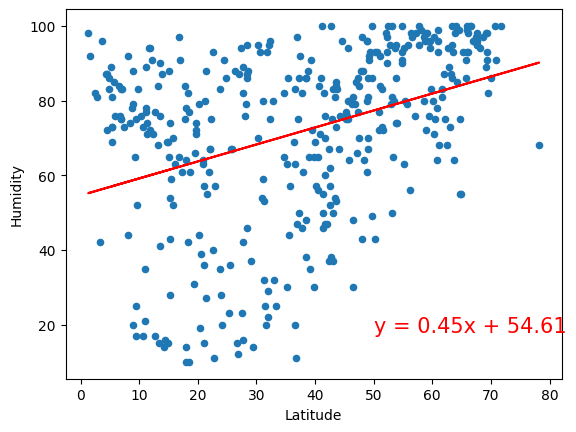

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Humidity", (50,18))

The r-value is: 0.0756470080290728


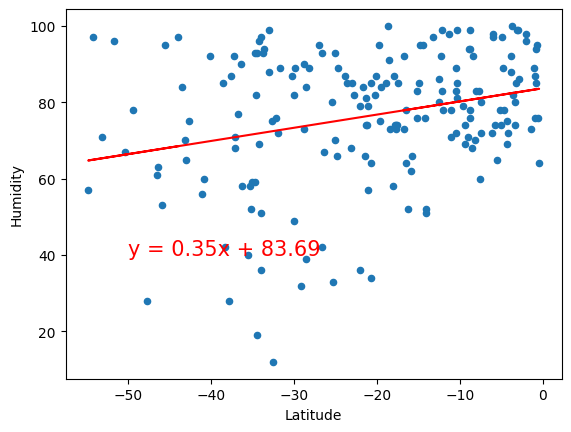

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Humidity", (-50,40))

**Discussion about the linear relationship:** The low r values indicate a weak to no relationship between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Cloudiness", (30,30))

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Coudiness", (-40,100))

**Discussion about the linear relationship:** The low r values indicate a weak positive relationship between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (40,30))


In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Wind Speed", (-20,15))

**Discussion about the linear relationship:** The low r values indicate that there is no real relationship between wind speed and latitude.